In [8]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
path = os.getcwd()
raw_data = pd.read_csv(path+"/train.csv")
raw_data["Vinyl"].value_counts(dropna=False)
raw_data.head()

,Id,PreferedAlbum,Vinyl,AvgTime,TicketInfo,Opinion,Concert,Age,VIP,Food,Drinks,FreePass
0,01/2362,Head Hunters,False,3.055,B/140/N,"Everything worked, yet nothing surprised me. (...",NYC12-5pm,22.0,False,170.0,1.0,True
1,04/0599,Bright Size Life,True,2.510,LB/124/N,"Solid gig—nothing magical, nothing awful. (NYC...",NYC12-5pm,9.0,False,0.0,0.0,True
2,01/3223,Head Hunters,False,0.803,CB/523/N,"Guitars were sharp, but everything else felt r...",NYC12-5pm,NaN,False,815.0,37.0,False
3,01/1966,Kind of Blue,False,0.568,A/81/XL,Feedback screamed louder than the guitars. Dis...,FL16-7pm,36.0,False,1427.0,1395.0,False
4,01/8850,Bright Size Life,False,0.034,B/580/XL,NaN,NYC12-5pm,16.0,False,1299.0,0.0,False


In [10]:
path = os.getcwd()
raw_data_test = pd.read_csv(path+"/test.csv")
raw_data_test["Vinyl"].value_counts(dropna=False)
raw_data_test.head()

,Id,PreferedAlbum,Vinyl,AvgTime,TicketInfo,Opinion,Concert,Age,VIP,Food,Drinks
0,02/5375,Kind of Blue,True,1.531,LT/210/XL,NaN,NYC12-5pm,26.0,False,0.0,0.0
1,01/6673,Head Hunters,False,1.481,B/425/N,Zero chemistry on stage; I left before the enc...,NYC12-5pm,45.0,False,1595.0,13.0
2,02/0337,Bright Size Life,False,1.385,LB/63/XL,The band was unstoppable; unforgettable perfor...,NYC12-5pm,19.0,False,1400.0,1060.0
3,01/6655,Bright Size Life,True,1.894,B/422/N,Perfect setlist and epic encore—worth every ce...,NYC12-5pm,30.0,False,0.0,0.0
4,01/4723,Head Hunters,False,2.102,LB/888/XL,"They tried, yet the tempo kept slipping. (FL16).",FL16-7pm,17.0,False,262.0,502.0


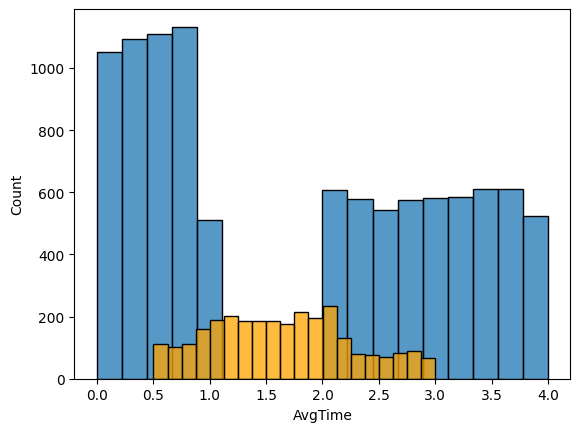

In [18]:
h=sns.histplot(raw_data, x="AvgTime")
h=sns.histplot(raw_data_test, x="AvgTime", color="orange")

#f=sns.histplot(raw_data, x="Food")
#f.set_xscale('log')

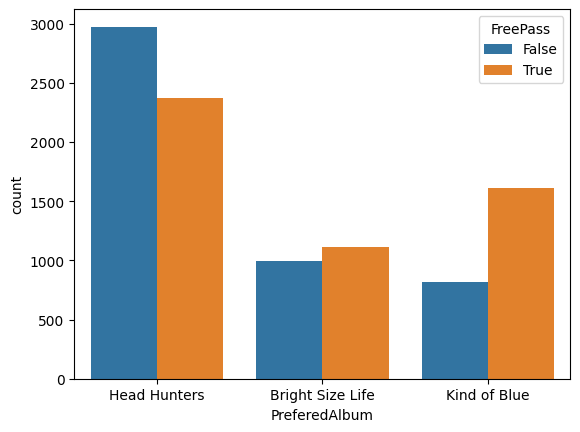

In [21]:
#a=sns.histplot(raw_data, x="Age")
#b=sns.histplot(raw_data_test, x="Age", color='orange')

#d=sns.histplot(raw_data, x="Drinks")
#e=sns.histplot(raw_data_test, x='Drinks', color='orange')
#d.set_xscale('log')
#d.set_yscale('log')

album_pass = sns.countplot(data=raw_data,x="PreferedAlbum",hue="FreePass")

/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: autodetected range of [-inf, 4.456366033129043] is not finite

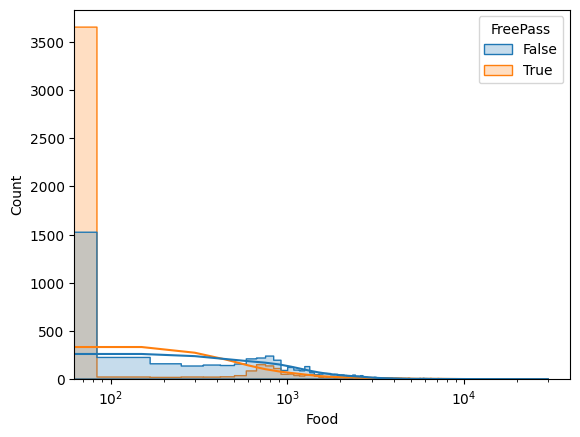

In [14]:
raw_data2 = raw_data[['Food','Drinks',"FreePass","AvgTime","Vinyl"]].fillna(value=0.0)
col = raw_data['Age'].fillna(value=raw_data['Age'].mean())
raw_data2['Age']=col
raw_data2['logDrinks']=np.log(raw_data2['Drinks'])
raw_data2['logFood']=np.log(raw_data2['Food'])
food_pass = sns.histplot(data=raw_data2, x="Food", hue="FreePass", kde=True, element='step', stat='count')
food_pass.set_xscale('log')
#sns.histplot(raw_data2, x="Vinyl", hue="FreePass")
drink_pass = sns.histplot(data=raw_data2, x="Drinks", hue="FreePass", kde=True, element='step', stat='count')
drink_pass.set_xscale('log')
age_pass = sns.histplot(data=raw_data,x="Age", hue="FreePass",kde=True, element='step',stat='count')

,Food,Drinks,FreePass,AvgTime,Age,logDrinks,logFood
Food,1.000000,0.271226,-0.066998,-0.062637,0.142467,0.044977,0.601709
Drinks,0.271226,1.000000,-0.294207,-0.275185,0.146143,0.594280,0.013874
FreePass,-0.066998,-0.294207,1.000000,0.938673,-0.074606,-0.288752,0.253409
AvgTime,-0.062637,-0.275185,0.938673,1.000000,-0.074406,-0.274208,0.242447
Age,0.142467,0.146143,-0.074606,-0.074406,1.000000,0.100159,0.083593
logDrinks,0.044977,0.594280,-0.288752,-0.274208,0.100159,1.000000,-0.203309
logFood,0.601709,0.013874,0.253409,0.242447,0.083593,-0.203309,1.000000


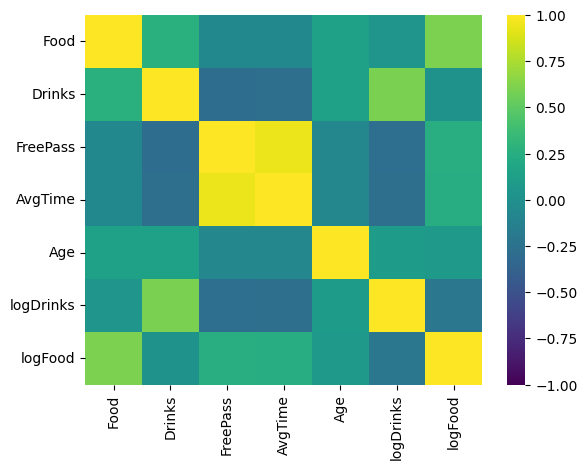

In [ ]:
corr_matrix=pd.DataFrame.corr(raw_data2)
sns.heatmap(corr_matrix, vmin=-1,vmax=1,cmap='viridis',)
corr_matrix

/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/seaborn/distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/seaborn/distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


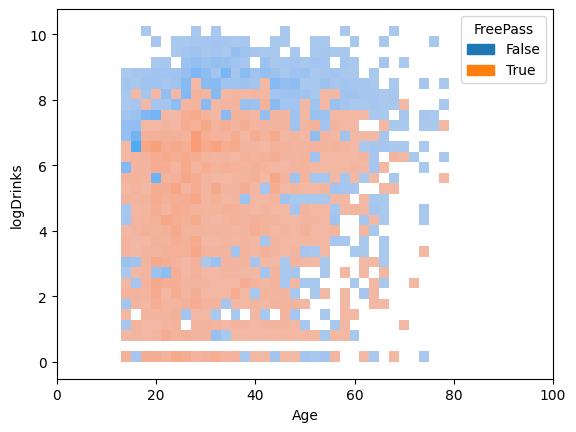

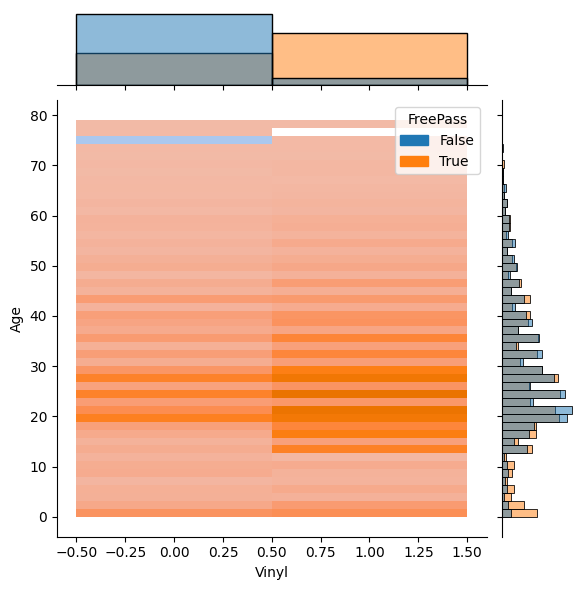

In [16]:
jntplt2 = sns.histplot(raw_data2, x='Age', y='logDrinks', hue='FreePass', multiple='layer')
jntplt2.set_xlim(0,100)



jnt_fooddrink = sns.JointGrid(data=raw_data, x=raw_data['Vinyl'].astype('category'), y='Age', hue='FreePass')
jnt_fooddrink.plot(sns.histplot, sns.histplot)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import textblob as tb

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

def preprocess_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopwords.words('english')]

    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/peterclark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/peterclark/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/peterclark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


------------------------------------------
## ML Models and Predicting FreePass ##

Linear Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, log_loss
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier


In [ ]:
def split_ticket(ticket):
        try:
            parts = str(ticket).split('/')
            # Returns (TicketType, TicketClass)
            # Example: 'CB/734/XL' -> 'CB', 'XL'
            return parts[0], int(parts[1]), parts[-1]
        except:
            return None, 0, None

sia=SentimentIntensityAnalyzer()
def vader_polarity(text):
    if not isinstance(text, str) or text.strip() == "":
        return 0.0
    return sia.polarity_scores(text)["compound"]


def preprocess_csv(path, save=False, filename=""):
    data = pd.read_csv(path)

    # Fill NaNs #
    # Numerical Columns with Median #
    print(f"Missing values: {data.isnull().sum().sum()}")
    print(f"Missing values in Age: {data['Age'].isnull().sum()}") 
    data['Age'] = data['Age'].fillna(data['Age'].median())
    # Categorical Columns with Mode#
    print(f"Missing values in Concert: {data['Concert'].isnull().sum()}")
    print(f"Missing values in TicketInfo: {data['TicketInfo'].isnull().sum()}")
    print(f"Missing values in PreferedAlbum: {data['PreferedAlbum'].isnull().sum()}")
    print(f"Missing values in Vinyl: {data['Vinyl'].isnull().sum()}")
    print(f"Missing values in VIP: {data['VIP'].isnull().sum()}")
    cat_cols = ['Concert', 'TicketInfo', 'PreferedAlbum', 'Vinyl', 'VIP']
    for col in cat_cols:
        # Mode returns a series, we take the first element [0]
        data[col] = data[col].fillna(data[col].mode()[0])
    print(f"Still missing values: {data.isnull().sum().sum()}")

    data["Opinion_Polarity"] = (data["Opinion"].apply(preprocess_text).apply(vader_polarity))
    data['Concert_City'] = data['Concert'].astype(str).str.extract(r'^([A-Za-z]+)') # concert city 
    data['Concert_StartTime'] = data['Concert'].astype(str).str.extract(r'([A-Za-z]+)(\d+)-', expand=False)[1].astype(float) # Extract end time (the number after the dash, before 'pm')
    data['Concert_EndTime'] = data['Concert'].astype(str).str.extract(r'-(\d+)pm').astype(float)
    data['Concert_Duration'] = 12+data['Concert_EndTime'] - data['Concert_StartTime']
    data = data.drop(columns=['Concert'])
    
    # Apply function and create two new columns
    data[['Ticket_Type', 'Ticket_Num', 'Ticket_Class']] = data['TicketInfo'].apply(
        lambda x: pd.Series(split_ticket(x))
    )

    # Create dummy variables (One-Hot Encoding)
    # drop_first=True avoids multicollinearity (e.g., if not Male, then Female)
    still_not_number_cols = ['PreferedAlbum', 'Vinyl', 'VIP', 'Concert_City', 'Ticket_Type', 'Ticket_Class']
    df_encoded = pd.get_dummies(data, columns=still_not_number_cols, drop_first=True)
    df_final = df_encoded.drop(columns=['Opinion', 'TicketInfo']) # drop processed columns

    if save:
        df_final.to_csv(filename, index=False)

    return df_final

In [ ]:
data=preprocess_csv(path+'/train.csv', save=False, filename=path+'/train_cleaned.csv')
data.columns

Missing values: 2885
Missing values in Age: 216
Missing values in Concert: 216
Missing values in TicketInfo: 231
Missing values in PreferedAlbum: 235
Missing values in Vinyl: 249
Missing values in VIP: 235
Still missing values: 1503


Index(['Id', 'AvgTime', 'Age', 'Food', 'Drinks', 'FreePass',
       'Opinion_Polarity', 'Concert_StartTime', 'Concert_EndTime',
       'Concert_Duration', 'Ticket_Num', 'PreferedAlbum_Head Hunters',
       'PreferedAlbum_Kind of Blue', 'Vinyl_True', 'VIP_True',
       'Concert_City_NYC', 'Concert_City_SF', 'Ticket_Type_B',
       'Ticket_Type_CB', 'Ticket_Type_LB', 'Ticket_Type_LT', 'Ticket_Type_PB',
       'Ticket_Type_RB', 'Ticket_Type_RT', 'Ticket_Class_XL'],
      dtype='object')

In [ ]:
data_test = preprocess_csv(path+"/test.csv", save=True, filename=path+"/test_cleaned.csv")
data_test.head()

Missing values: 767
Missing values in Age: 54
Missing values in Concert: 58
Missing values in TicketInfo: 68
Missing values in PreferedAlbum: 53
Missing values in Vinyl: 61
Missing values in VIP: 61
Still missing values: 412


,Id,AvgTime,Age,Food,Drinks,Opinion_Polarity,Concert_StartTime,Concert_EndTime,Concert_Duration,Ticket_Num,...,Concert_City_NYC,Concert_City_SF,Ticket_Type_B,Ticket_Type_CB,Ticket_Type_LB,Ticket_Type_LT,Ticket_Type_PB,Ticket_Type_RB,Ticket_Type_RT,Ticket_Class_XL
0,02/5375,1.531,26.0,0.0,0.0,0.0000,12.0,5.0,5.0,210,...,1,0,0,0,0,1,0,0,0,1
1,01/6673,1.481,45.0,1595.0,13.0,0.5994,12.0,5.0,5.0,425,...,1,0,1,0,0,0,0,0,0,0
2,02/0337,1.385,19.0,1400.0,1060.0,-0.2023,12.0,5.0,5.0,63,...,1,0,0,0,1,0,0,0,0,1
3,01/6655,1.894,30.0,0.0,0.0,0.5719,12.0,5.0,5.0,422,...,1,0,1,0,0,0,0,0,0,0
4,01/4723,2.102,17.0,262.0,502.0,0.0000,16.0,7.0,3.0,888,...,0,0,0,0,1,0,0,0,0,1


/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_1923/3925965355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion_data["cleanOpinion"] = raw_data['Opinion'].apply(preprocess_text)


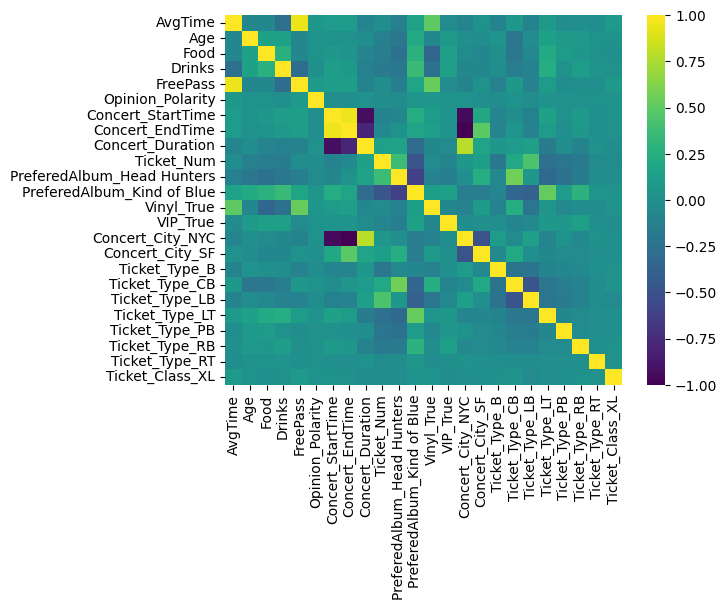

In [ ]:
corr = pd.DataFrame.corr(data)
corr_graph=sns.heatmap(corr, vmin=-1,vmax=1,cmap='viridis')
corr_graph.plot()
opinion_data = raw_data['Opinion']
opinion_data["cleanOpinion"] = raw_data['Opinion'].apply(preprocess_text)
sia = SentimentIntensityAnalyzer()

opinion_data['sentiment'] = opinion_data['cleanOpinion'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)
opinion_data['FreePass']=raw_data["FreePass"].astype(int)
opinion_data['Age']=raw_data["Age"].astype(float)


[]

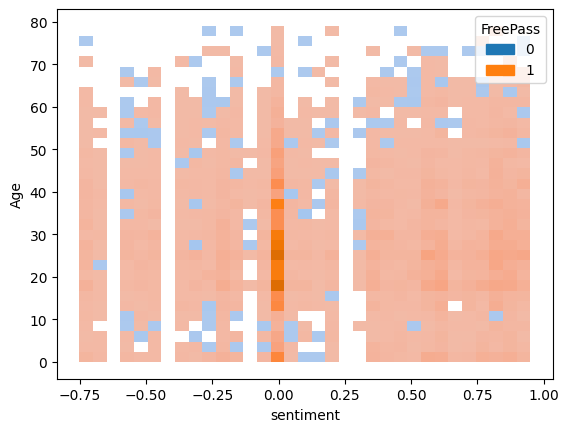

In [ ]:
extra=sns.histplot(data=opinion_data, x='sentiment',y="Age", hue='FreePass', kde=True,element='step',stat='count', bins=33)
extra.plot()

In [ ]:
data['logDrinks']=np.log1p(data['Drinks'])
data['logFood']=np.log1p(data['Food'])

data_test['logDrinks']=np.log1p(data_test['Drinks'])
data_test['logFood']=np.log1p(data_test['Food'])


In [ ]:
data['FoodRate']=data["Food"]/data['AvgTime']
data['DrinkRate']=data["Drinks"]/data['AvgTime']
data['FoodRate']=data['logFoodRate'].fillna(value=0.0)
data['DrinkRate']=data['DrinkRate'].fillna(value=0.0)

data_test['FoodRate']=data_test["Food"]/data_test['AvgTime']
data_test['DrinkRate']=data_test["Drinks"]/data_test['AvgTime']

data_test['FoodRate']=data_test['FoodRate'].fillna(value=0.0)
data_test['DrinkRate']=data_test['DrinkRate'].fillna(value=0.0)


,Id,AvgTime,Age,Food,Drinks,FreePass,Opinion_Polarity,Concert_StartTime,Concert_EndTime,Concert_Duration,...,Ticket_Type_PB,Ticket_Type_RB,Ticket_Type_RT,Ticket_Class_XL,logDrinks,logFood,logFoodRate,logDrinkRate,FoodRate,DrinkRate


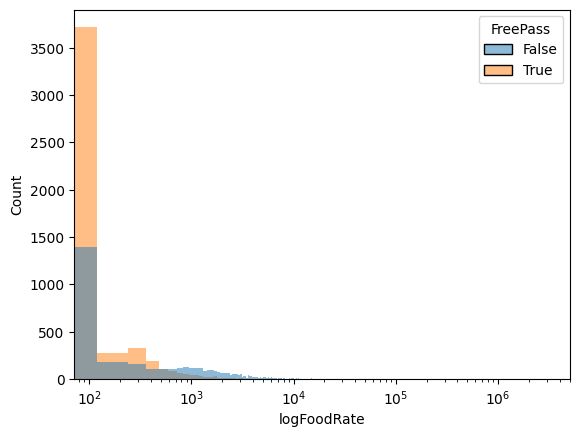

In [ ]:
rates = sns.histplot(data, x='FoodRate', hue='FreePass')
rates.set_xscale('log')
#jnt_fooddrink = sns.JointGrid(data=data, x='Age', y='logFoodRate', hue='FreePass')
#jnt_fooddrink.plot(sns.histplot, sns.histplot)

In [ ]:
data.columns

Index(['Id', 'AvgTime', 'Age', 'Food', 'Drinks', 'FreePass',
       'Opinion_Polarity', 'Concert_StartTime', 'Concert_EndTime',
       'Concert_Duration', 'Ticket_Num', 'PreferedAlbum_Head Hunters',
       'PreferedAlbum_Kind of Blue', 'Vinyl_True', 'VIP_True',
       'Concert_City_NYC', 'Concert_City_SF', 'Ticket_Type_B',
       'Ticket_Type_CB', 'Ticket_Type_LB', 'Ticket_Type_LT', 'Ticket_Type_PB',
       'Ticket_Type_RB', 'Ticket_Type_RT', 'Ticket_Class_XL', 'logDrinks',
       'logFood', 'logFoodRate', 'logDrinkRate'],
      dtype='object')

In [ ]:
# Prepare training data -> split training set into (70% / 15% / 15%) #
X=data.drop(columns=["Id","FreePass", "AvgTime",'Concert_City_NYC', 'Concert_City_SF','Concert_StartTime', 'Concert_EndTime', 'Concert_Duration'])
Y=data["FreePass"]
IDs=data["Id"]

data_test_IDs = data_test["Id"]
X_test_ext = data_test.drop(columns=["Id","AvgTime",'Concert_City_NYC', 'Concert_City_SF','Concert_StartTime', 'Concert_EndTime', 'Concert_Duration'])

randstate=np.random.randint(0,1000)
randstate2=np.random.randint(0,1000)
print(f"{randstate} {randstate2}")

# 100 -> 70/30 #
X_train, X_hold, Y_train, Y_hold, ID_train, ID_hold = train_test_split(
    X,Y,IDs,
    test_size=0.3,
    random_state=randstate,
    stratify=Y
)

# 30 -> 15/15 #
X_val, X_test, Y_val, Y_test, ID_val, ID_test = train_test_split(
    X_hold,Y_hold,ID_hold,
    test_size=0.5,
    random_state=randstate2,
    stratify=Y_hold
)

195 401


In [ ]:
## LINEAR REGRESSION PIPELINE -- NOT GOOD FOR THIS PROBLEM ##
regression_pipeline = Pipeline(
    steps=[
    ("scalar", StandardScaler(with_mean=False)),
    ("regression", LinearRegression())
    ]
)
# Train #
regression_pipeline.fit(X_train,Y_train)

# Predict #
train_pred = regression_pipeline.predict(X_train)
val_pred = regression_pipeline.predict(X_val)
test_pred = regression_pipeline.predict(X_test)


model_output = regression_pipeline.predict(X_test_ext)
model_freepass = (model_output >= 0.5)

metrics = {
    "train_mse": mean_squared_error(Y_train, train_pred),
    "val_mse":   mean_squared_error(Y_val, val_pred),
    "test_mse":  mean_squared_error(Y_test, test_pred),
    "train_auc": roc_auc_score(Y_train, train_pred),
    "val_auc":   roc_auc_score(Y_val, val_pred),
    "test_auc":  roc_auc_score(Y_test, test_pred),
}

output = (
    data_test_IDs
    .to_frame(name="Id")
    .assign(FreePass_pred=model_freepass)
)
#output.to_csv(os.getcwd()+"/results/linear_regression_jan12.csv", index=False)

metrics

In [ ]:
logistic_l1 = Pipeline([
    ("scaler", RobustScaler()),
    ("clf", LogisticRegression(
        penalty="l1",
        solver="liblinear",
        max_iter=1000,
        class_weight="balanced"
    ))
])
dlog_l1 = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("clf", LogisticRegression(
        penalty="l1",
        solver="liblinear",
        max_iter=2000,
        class_weight="balanced"
    ))
])
elastic_log = Pipeline([
    ("scaler", RobustScaler()),
    ("clf", LogisticRegression(
        penalty="elasticnet",
        solver="saga",
        l1_ratio=0.3,
        max_iter=4000,
        class_weight="balanced"
    ))
])

grad_boost_tree = HistGradientBoostingClassifier(
    #n_estimators=150,
    learning_rate=0.04,
    max_depth=3,
    random_state=randstate
)

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_leaf=15,
    class_weight="balanced",
    random_state=randstate,
    n_jobs=-1
)

def train_model(model, x_train, y_train):
    model.fit(x_train, y_train)
    return model

def eval_model(model, x, y=None, threshold=0.5):
    score = model.predict_proba(x)[:,1]
    output = score >= threshold
    metrics=[]
    if y is not None:
        metrics.append(roc_auc_score(y,score))
        metrics.append(np.sum(y==output)/(len(y)))
        metrics.append(log_loss(y, score))
    return score, output, metrics

In [ ]:
pipelines = [logistic_l1, grad_boost_tree, elastic_log, rf]
model_names = ["logistic_l1", "grad_boost_tree", "elastic_log", "rf", "dummy_model"]
models=[]

# Train models #
for ppl in pipelines:
    models.append(train_model(ppl, X_train, Y_train))
dummy_answers = Y_train.sample(frac=1.0, random_state=55).values
dummy_model = train_model(dlog_l1, X_train, dummy_answers)
models.append(dummy_model)

thresholds=np.linspace(0.2, 0.8, 40)

# Evaluate with validation split
metrics_all_val = []
for _,m in enumerate(models):
    metrics_model=[]
    print(f"----------- ({str(model_names[_])})")
    for t in thresholds:
        scores,output,metrics = eval_model(m, X_val, Y_val, t)
        metrics_model.append(metrics)
    metrics_all_val.append(metrics_model)

metrics_all = []
for _,m in enumerate(models):
    metrics_model=[]
    print(f"----------- ({str(model_names[_])})")
    for t in thresholds:
        scores,output,metrics = eval_model(m, X_test, Y_test, t)
        metrics_model.append(metrics)
    metrics_all.append(metrics_model)


/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


----------- (logistic_l1)
----------- (grad_boost_tree)
----------- (elastic_log)
----------- (rf)
----------- (dummy_model)
----------- (logistic_l1)
----------- (grad_boost_tree)
----------- (elastic_log)
----------- (rf)
----------- (dummy_model)


In [ ]:
plot_metrics_val = []
for _m, m in enumerate(metrics_all_val):
    acc=[]
    roc=[]
    logloss=[]
    for _t, t in enumerate(metrics_all_val[_m]):
        #print(t)
        roc.append(t[0])
        acc.append(t[1])
        logloss.append(t[2])
    roc=np.asarray(roc, dtype=float)
    acc=np.asarray(acc, dtype=float)
    logloss=np.asarray(logloss, dtype=float)
    plot_metrics_val.append([roc, acc, logloss])
plot_metrics_val=np.asarray(plot_metrics_val)
print("Validation: ")
for _, mdl in enumerate(plot_metrics_val):
    print(f"{np.max(plot_metrics_val[_,1,:]):.4f}(th={thresholds[np.argmax(plot_metrics_val[_,1,:])]:.2f}) -- {model_names[_]}")

plot_metrics = []
for _m, m in enumerate(metrics_all):
    acc=[]
    roc=[]
    logloss=[]
    for _t, t in enumerate(metrics_all[_m]):
        #print(t)
        roc.append(t[0])
        acc.append(t[1])
        logloss.append(t[2])
    roc=np.asarray(roc, dtype=float)
    acc=np.asarray(acc, dtype=float)
    logloss=np.asarray(logloss, dtype=float)
    plot_metrics.append([roc, acc, logloss])
plot_metrics=np.asarray(plot_metrics)

print("Test: ")
for _, mdl in enumerate(plot_metrics):
    print(f"{np.max(plot_metrics[_,1,:]):.4f}(th={thresholds[np.argmax(plot_metrics[_,1,:])]:.2f}) -- {model_names[_]}")

Validation: 
0.9374(th=0.48) -- logistic_l1
0.9249(th=0.51) -- grad_boost_tree
0.9103(th=0.51) -- elastic_log
0.9321(th=0.55) -- rf
0.5162(th=0.43) -- dummy_model
Test: 
0.9466(th=0.40) -- logistic_l1
0.9315(th=0.35) -- grad_boost_tree
0.9157(th=0.52) -- elastic_log
0.9394(th=0.55) -- rf
0.5171(th=0.46) -- dummy_model


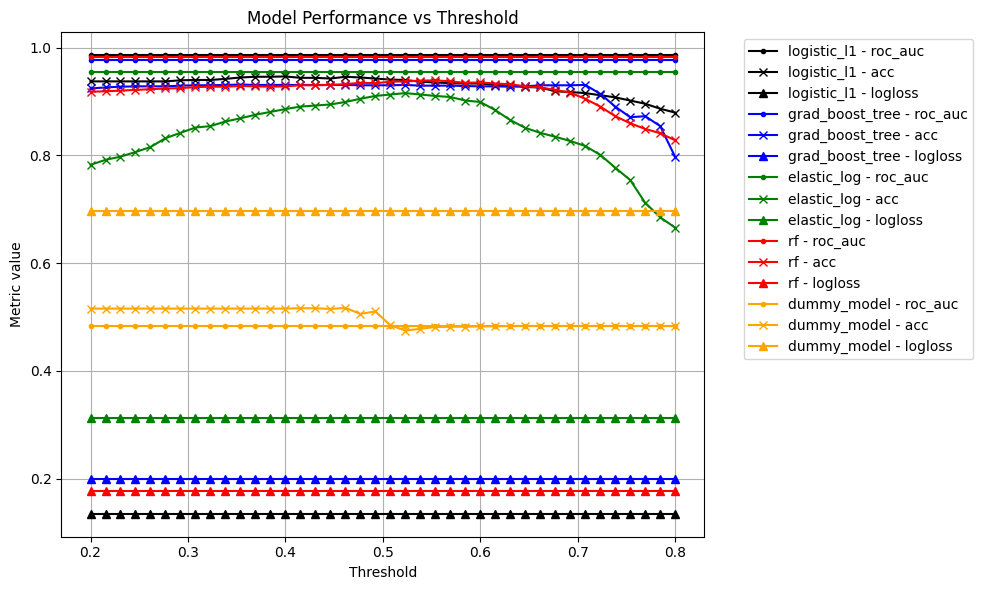

In [ ]:
plot_metrics_names = ["roc_auc", "acc", "logloss"]

plt.figure(figsize=(10, 6))
colors=['black', 'blue', 'green', 'red', 'orange']
markers = [".","x","^"]
# Loop over models
for i, model in enumerate(plot_metrics):
    # Select only this model's rows
    
    # Plot each metric for this model
    for n, mtrc in enumerate(plot_metrics_names):
        plt.plot(
            thresholds,
            plot_metrics[i][n],
            marker=markers[n],
            color=colors[i],
            label=f"{model_names[i]} - {mtrc}"
        )

plt.title("Model Performance vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Metric value")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model_names

['logistic_l1', 'grad_boost_tree', 'elastic_log', 'rf', 'dummy_model']

In [ ]:
## To Save CSV [NEEDS FIXING -> Modular for each model]

output= models[0].predict(X_test_ext)
output2= models[3].predict(X_test_ext)
output_pred = output >= 0.40
output_pred2 = output2 >= 0.55
output_df = (
    data_test_IDs
    .to_frame(name="Id")
    .assign(FreePass=output_pred)
)
output_df

output_df.to_csv(os.getcwd()+"/results/logistic_regression-Alex_Peter-JAN16-2.csv", index=False)
output_df2 = (
    data_test_IDs
    .to_frame(name="Id")
    .assign(FreePass=output_pred2)
)
output_df2

output_df2.to_csv(os.getcwd()+"/results/random_forest-Alex_Peter-JAN16-2.csv", index=False)

: 

In [ ]:
logl1_coef = pd.Series(logistic_l1.named_steps["clf"].coef_[0], index=X_train.columns)
l_sorted=logl1_coef.sort_values(ascending=False)
l_sorted

gradboosttree_coef = pd.Series(grad_boost_tree.feature_importances_, index=X_train.columns)
gbt=gradboosttree_coef.sort_values(ascending=False)
gbt

leak_check = X_train.assign(FreePass=Y_train)

corr = leak_check.corr()["FreePass"].abs().sort_values(ascending=False)
corr.head(10)
